

**1. 뉴턴의 제2법칙**


 $F=ma=m\frac{dv}{dt}$ ​

-  질량 $m$ 인 물체에 작용하는 힘의 벡터적 합과 물체의 가속도 $a$ 와의 관계를 설명함

**2. 자유 낙하 운동**

-  질량 $m$ 인 물체가 속도 $v$ 로 운동할 때 공기저항력 $-kv$ 를 받음
-  운동 방향과 반대 방향으로 작용하는 공기저항력을 고려한 상황

**문제 요구사항**

-  **최고속도(종단속력)**: 정지 상태에서 낙하한 물체의 최고속도를 구함
-  **속도 관계식**: 시간 ttt에 대한 속도의 관계식을 구함

**미분방정식으로 표현**

-  방정식:

$$\frac{dv}{dt}+\frac{k}{m}v=g$$

-  이 식은 **1계 비제차 선형 상미분방정식**의 형태입니다.
-  일반적인 형태는 $\frac{dy}{dt}+p(t)y=q(t)$ 인데, 여기서 $p(t)=\frac{k}{m},q(t)=g$ 입니다.


**뉴턴의 제2법칙 적용: 자유 낙하 운동 시뮬레이션**


공기저항력이 있는 자유 낙하 운동의 경우, 다음 미분방정식을 사용합니다:


$$m\frac{dv}{dt}=mg-kv$$


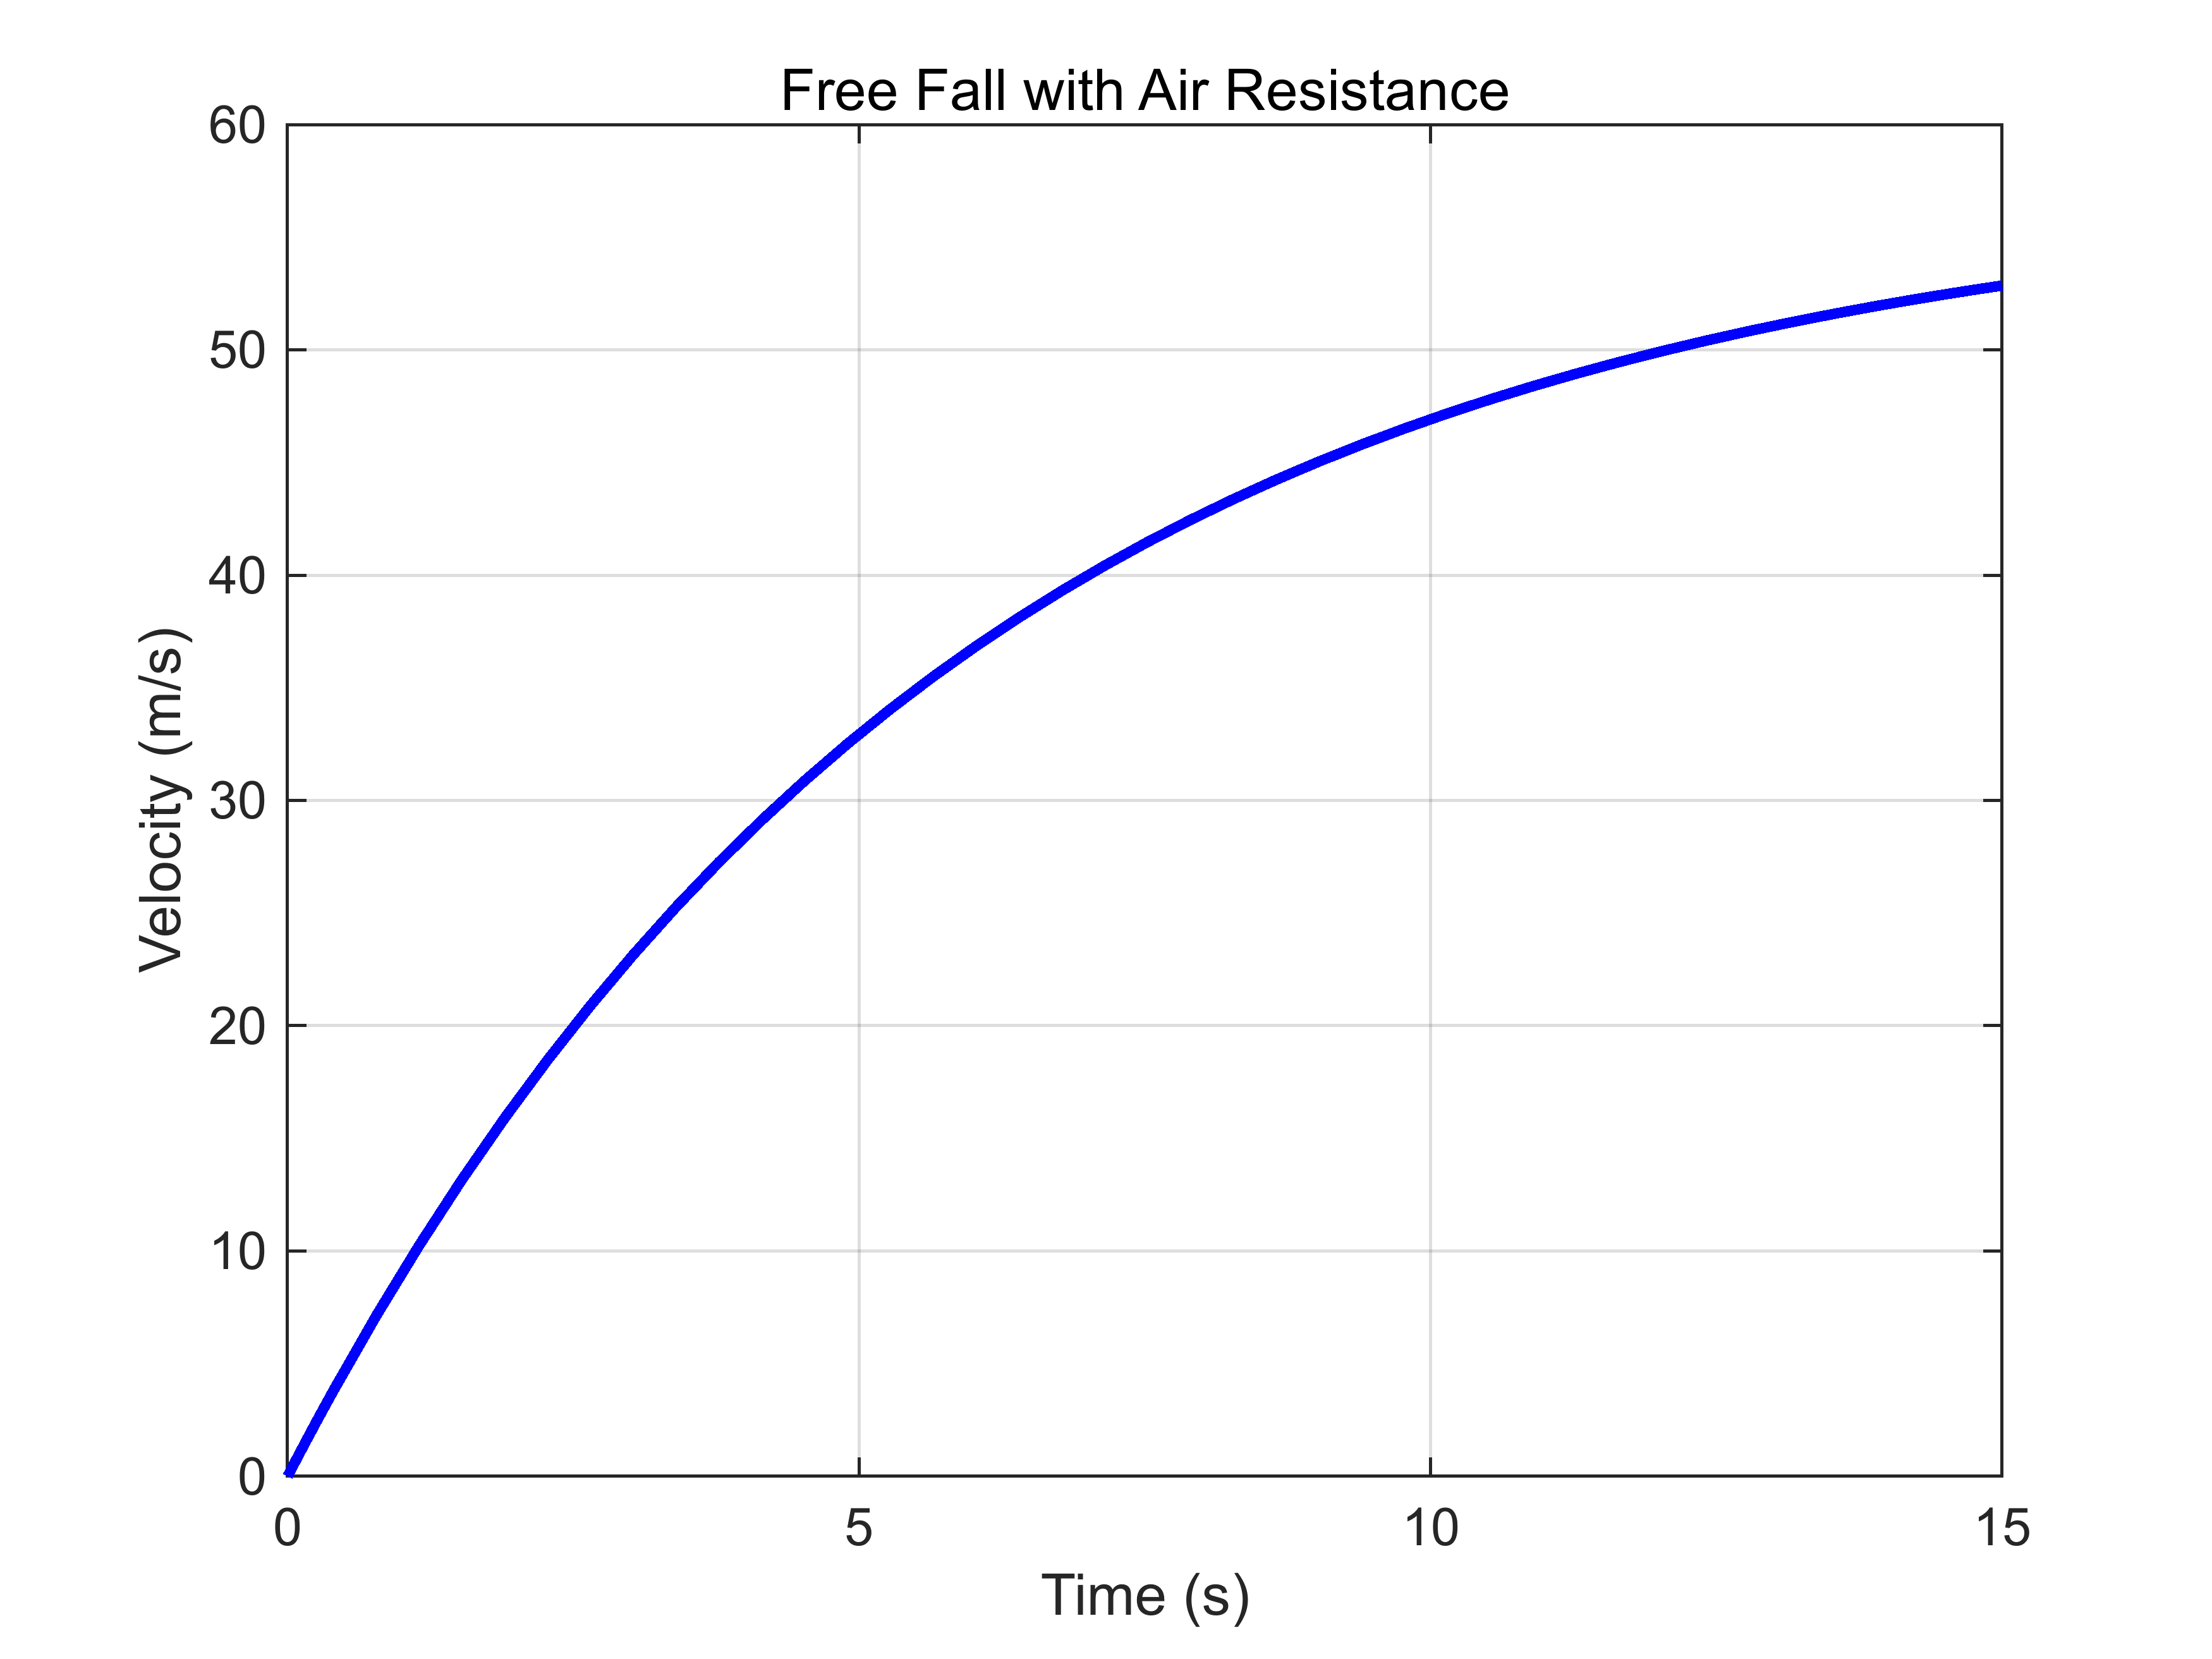

In [1]:
% 매개변수 설정
m = 70;    % 질량 (kg)
g = 9.81;  % 중력 가속도 (m/s^2)
k = 12;    % 공기 저항 계수 (kg/s)

% 미분방정식 정의
dvdt = @(t, v) (g - (k/m) * v);

% 초기 조건 설정
v0 = 0; % 초기 속도 (m/s)

% 시간 범위 설정
tspan = [0 15]; % 0초부터 15초까지

% ODE 솔버 사용
[t, v] = ode45(dvdt, tspan, v0);

% 결과 그래프 그리기
figure;
plot(t, v, 'b-', 'LineWidth', 2);
xlabel('Time (s)');
ylabel('Velocity (m/s)');
title('Free Fall with Air Resistance');
grid on;


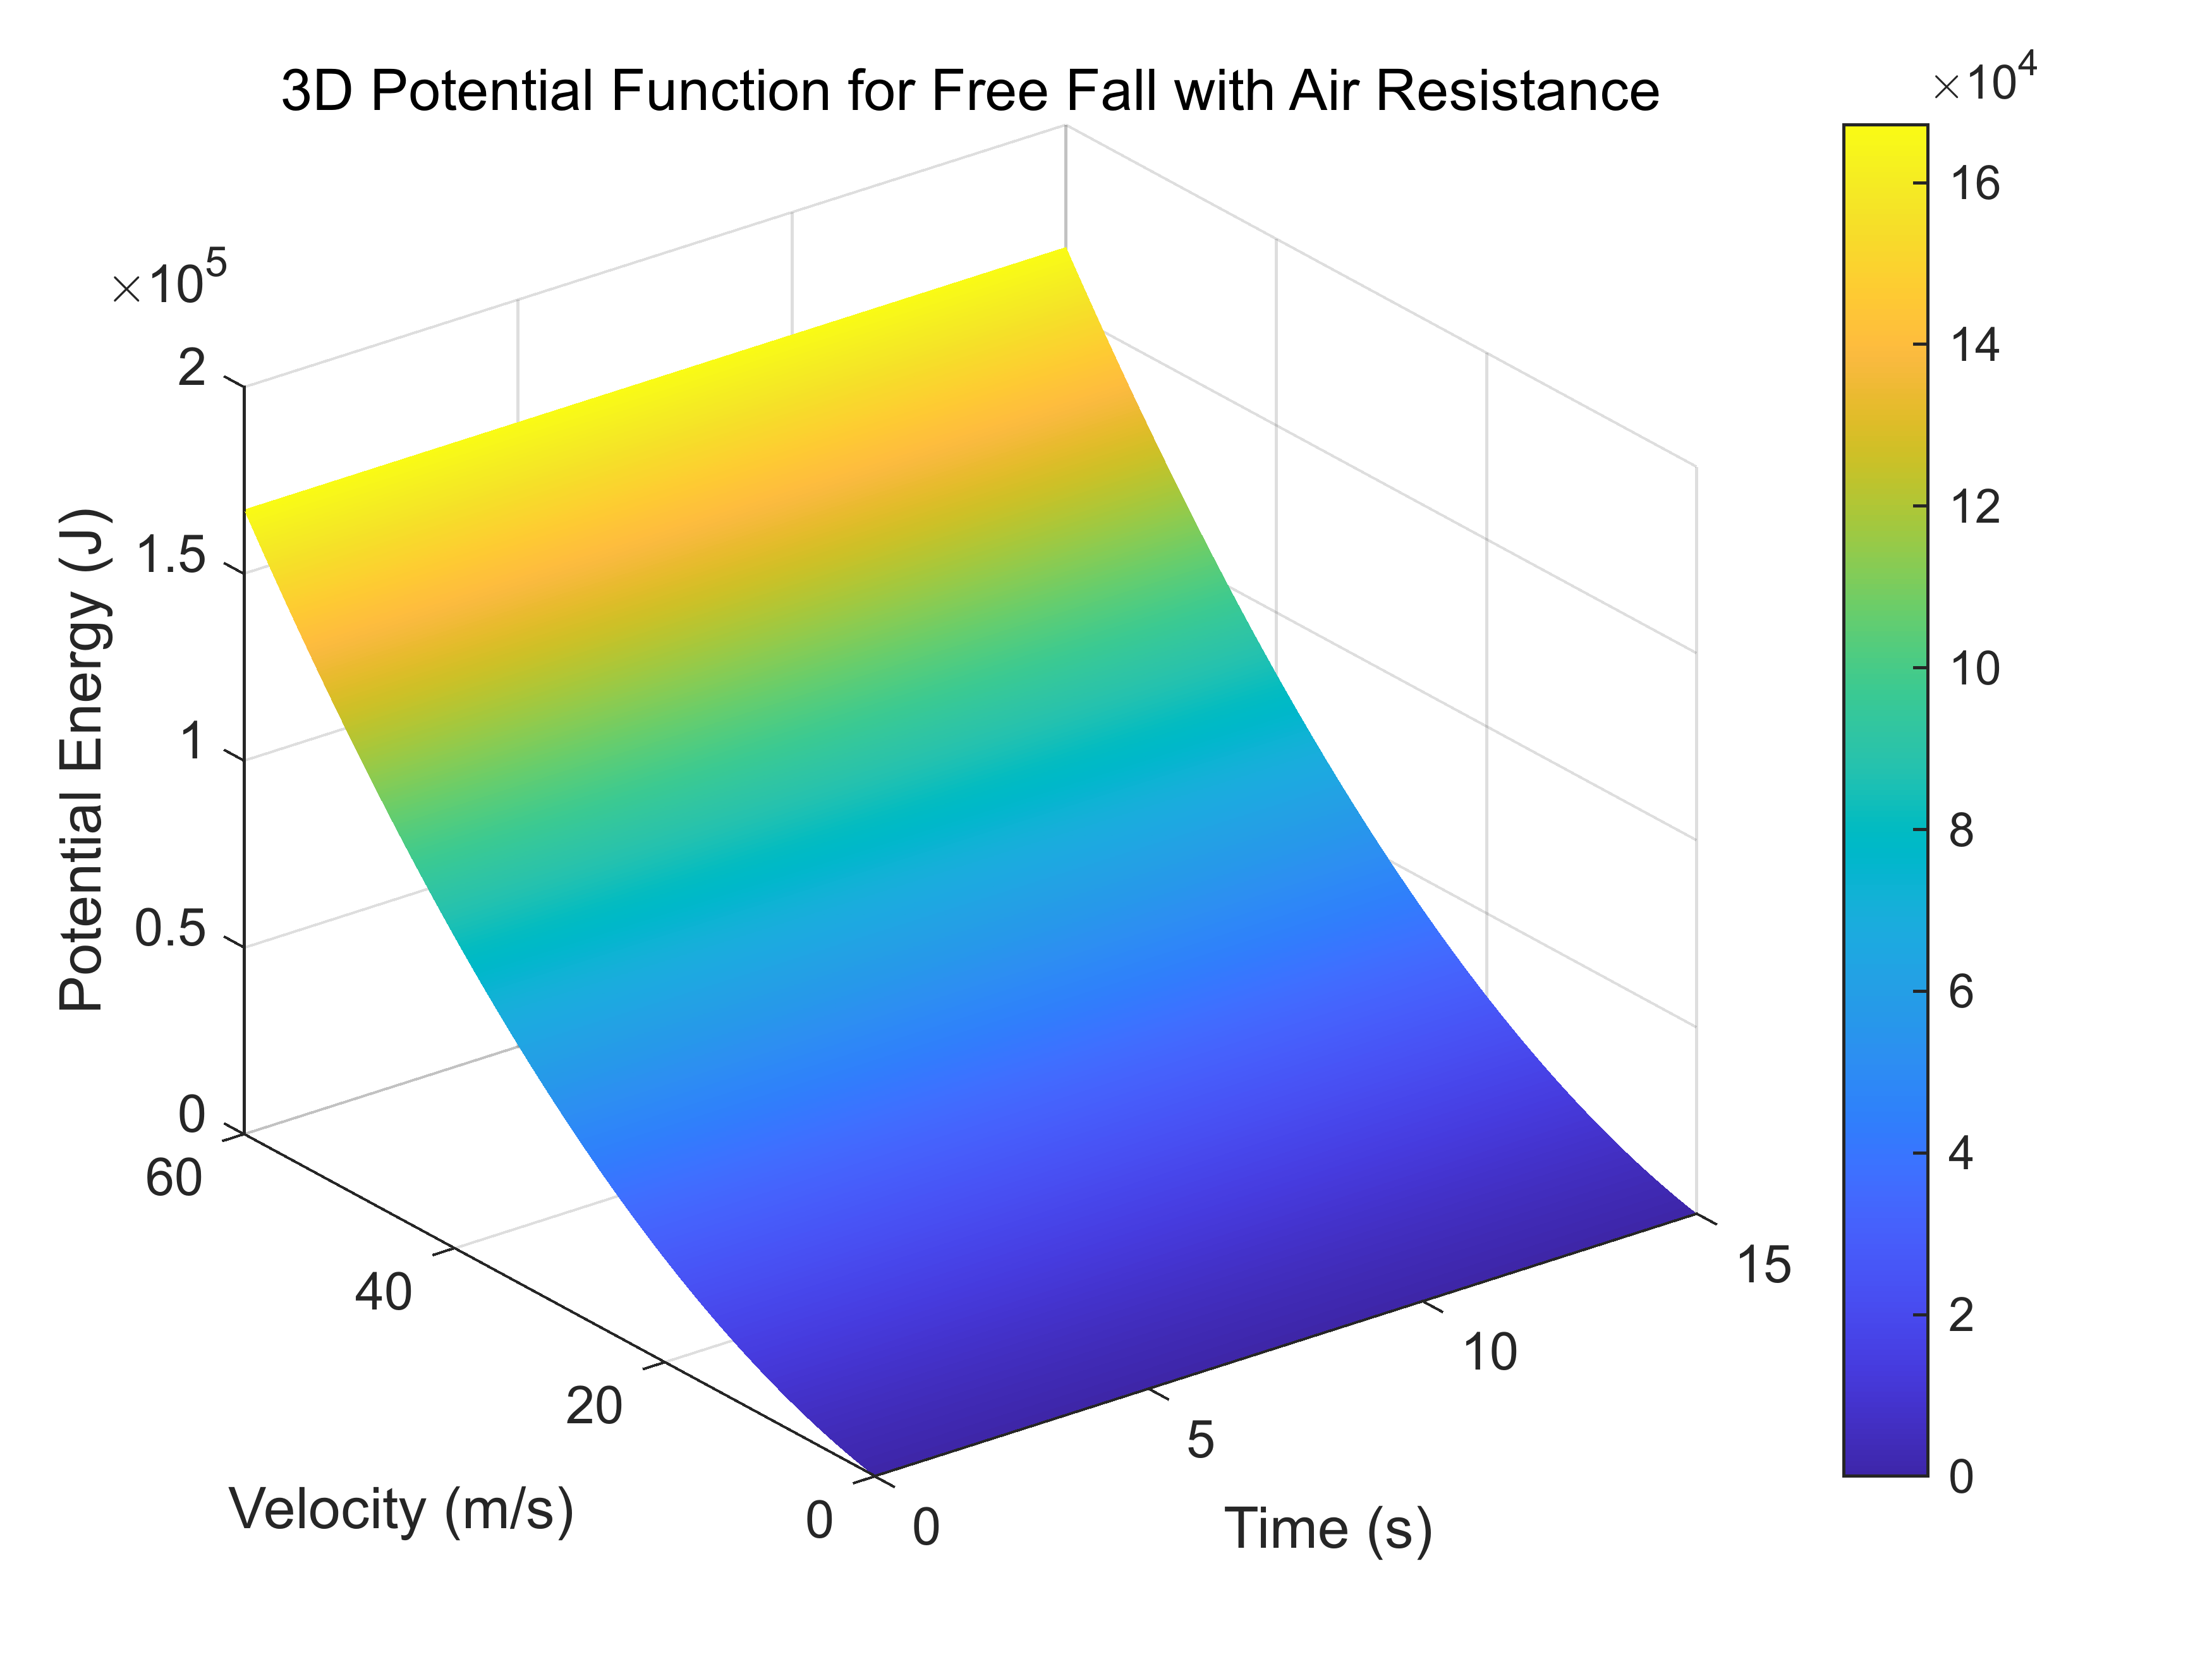

In [2]:
% 매개변수 설정
m = 70;   % 질량 (kg)
g = 9.81; % 중력 가속도 (m/s^2)
k = 12;   % 공기 저항 계수 (kg/s)

% 시간과 속도를 위한 meshgrid 설정
[t, v] = meshgrid(0:0.5:15, 0:0.5:60);

% 포텐셜 에너지 함수 계산
U = m*g*v + 0.5*m*(v.^2); % 중력에 의한 위치 에너지 및 운동에너지 합

% 그래프 그리기
figure;
surf(t, v, U);
xlabel('Time (s)');
ylabel('Velocity (m/s)');
zlabel('Potential Energy (J)');
title('3D Potential Function for Free Fall with Air Resistance');
grid on;
shading interp; % 그래프의 부드러운 표현
colorbar; % 색상막대 표시

## 일반해 계산.

 **1. 적분인자** $\mu (t)$ **계산**


적분인자는 다음과 같이 정의됩니다:


$$\mu (t)=e^{\int p(t)\,dt} =e^{\int \frac{k}{m}\,dt} =e^{\frac{k}{m}t}$$

**2. 방정식에 적분인자 곱하기**


원래 식에 적분인자를 곱하면:


$$e^{\frac{k}{m}t} \frac{dv}{dt}+e^{\frac{k}{m}t} \frac{k}{m}v=ge^{\frac{k}{m}t}$$

이 식은 다음과 같이 쓸 수 있습니다:


$$\frac{d}{dt}\left(e^{\frac{k}{m}t} v\right)=ge^{\frac{k}{m}t}$$

**3. 양변을 적분**


$$e^{\frac{k}{m}t} v=\int ge^{\frac{k}{m}t} \,dt$$

우변을 적분하면:


$$e^{\frac{k}{m}t} v=\frac{mg}{k}e^{\frac{k}{m}t} +C$$

따라서,


$$v=\frac{mg}{k}+Ce^{-\frac{k}{m}t}$$

**4. 일반해**


$$v(t)=\frac{mg}{k}+Ce^{-\frac{k}{m}t}$$

**초기 조건**

-  $t=0$ 에서 $v(0)=0$

이 초기 조건을 대입하면:


$$0=\frac{mg}{k}+C\cdot e^0$$

즉,


 $C=-\frac{mg}{k}$ ​


따라서, 초기 조건을 고려한 해는:


$$v(t)=\frac{mg}{k}\left(1-e^{-\frac{k}{m}t} \right)$$

#### 일반해의 완전상미분 방정식의 여부

주어진 식:


$$\frac{dv}{dt}+\frac{k}{m}v=g$$

이 식을 다음과 같은 형태로 표현할 수 있습니다:


$$\frac{dv}{dt}=g-\frac{k}{m}v$$

따라서, 다음과 같은 미분방정식 형태로 표현할 수 있습니다:


$$\frac{dv}{dt}+\frac{k}{m}v-g=0$$

이를 $M(v,t)+N(v,t)\frac{dv}{dt}=0$ 형태로 보면,


$$M(v,t)=\frac{k}{m}v-g,~~N(v,t)=1$$

**완전성 확인**

-  $\frac{\partial M}{\partial t}=0$ (왜냐하면 $M$ 에는 $t$ 에 대한 직접적인 의존성이 없음)
-  $\frac{\partial N}{\partial v}=0$ (왜냐하면 $N$ 은 $v$ 에 대한 의존성이 없음)

 $\frac{\partial M}{\partial t}\not= \frac{\partial N}{\partial v}$ ​인 경우, 이는 완전 미분방정식이 아닙니다. 따라서 이 방정식은 **비완전 상미분방정식**입니다.

## 포텐셜 함수로 변환




**자유 낙하 운동에서의 포텐셜 에너지**


자유 낙하 운동에서 속도 $v(t)=\frac{mg}{k}(1-e^{-\frac{k}{m}t} )$ 는 속도의 시간 변화를 나타냅니다.

-  **위치 에너지**: 중력에 의한 위치 에너지 $U(t)$ 는 일반적으로 $U=mgh$ 로 나타내지만, 속도와의 관계를 확인하려면 운동 에너지를 함께 고려해야 합니다.
-   **운동 에너지** $K$ :

$$K(t)=\frac{1}{2}mv(t)^2 =\frac{1}{2}m{\left(\frac{mg}{k}(1-e^{-\frac{k}{m}t} )\right)}^2$$

이 식이 직접적인 포텐셜 함수를 나타내지는 않지만, 시스템의 에너지 변화를 설명합니다. 자유 낙하에서는 위치 에너지와 운동 에너지 간의 변환을 통해 전체 에너지 보존을 확인할 수 있으며, 포텐셜 함수는 주로 위치 함수로 나타냅니다.



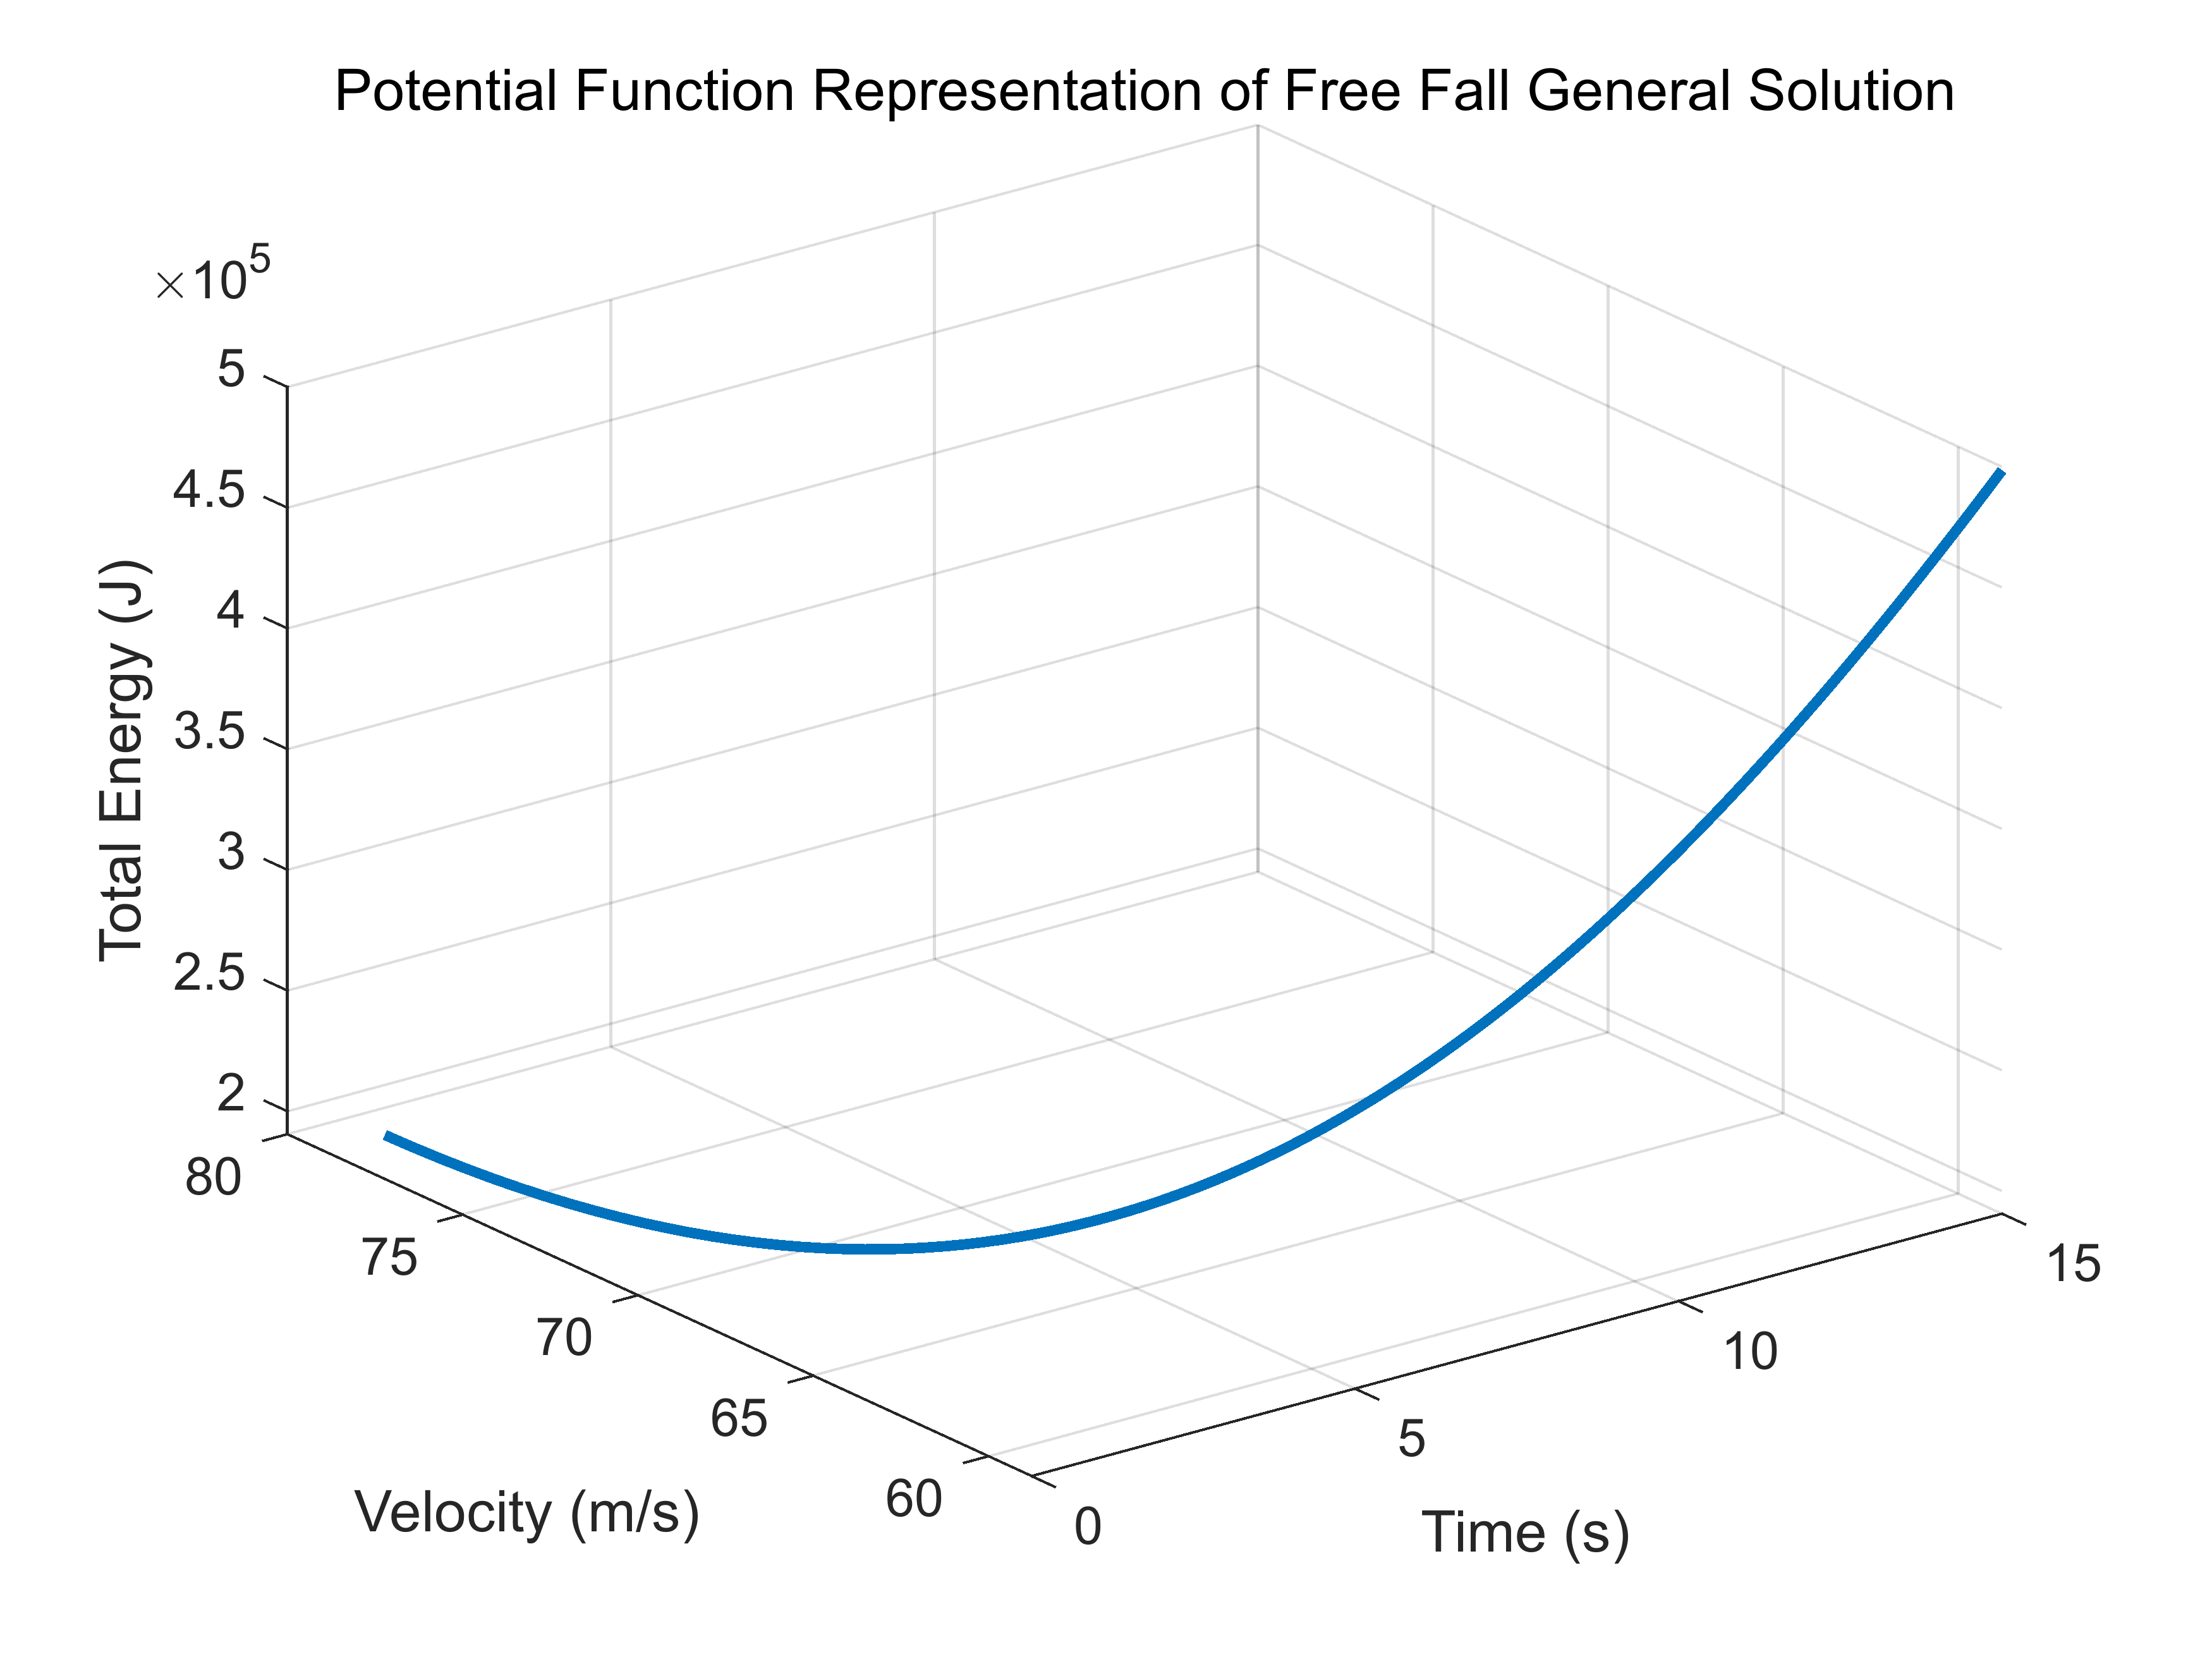

In [3]:
% 매개변수 설정
m = 70;   % 질량 (kg)
g = 9.81; % 중력 가속도 (m/s^2)
k = 12;   % 공기 저항 계수 (kg/s)
C = 20;   % 초기조건으로부터 결정되는 상수

% 시간 범위 설정
t = linspace(0, 15, 100); % 0부터 15초까지

% 속도 v(t)의 일반해
v = (m * g / k) + C * exp(-k / m * t);

% 운동 에너지 K와 위치 에너지 U 계산
K = 0.5 * m * v.^2;  % 운동 에너지
h = (m * g / k) * t - (m^2 * g / k^2) * (1 - exp(-k / m * t)); % 시간에 따른 높이 (적분 결과)
U = m * g * h;       % 위치 에너지

% 총 에너지 E(t)
E = K + U;

% 3D 그래프 그리기
figure;
plot3(t, v, E, 'LineWidth', 2);
xlabel('Time (s)');
ylabel('Velocity (m/s)');
zlabel('Total Energy (J)');
title('Potential Function Representation of Free Fall General Solution');
grid on;


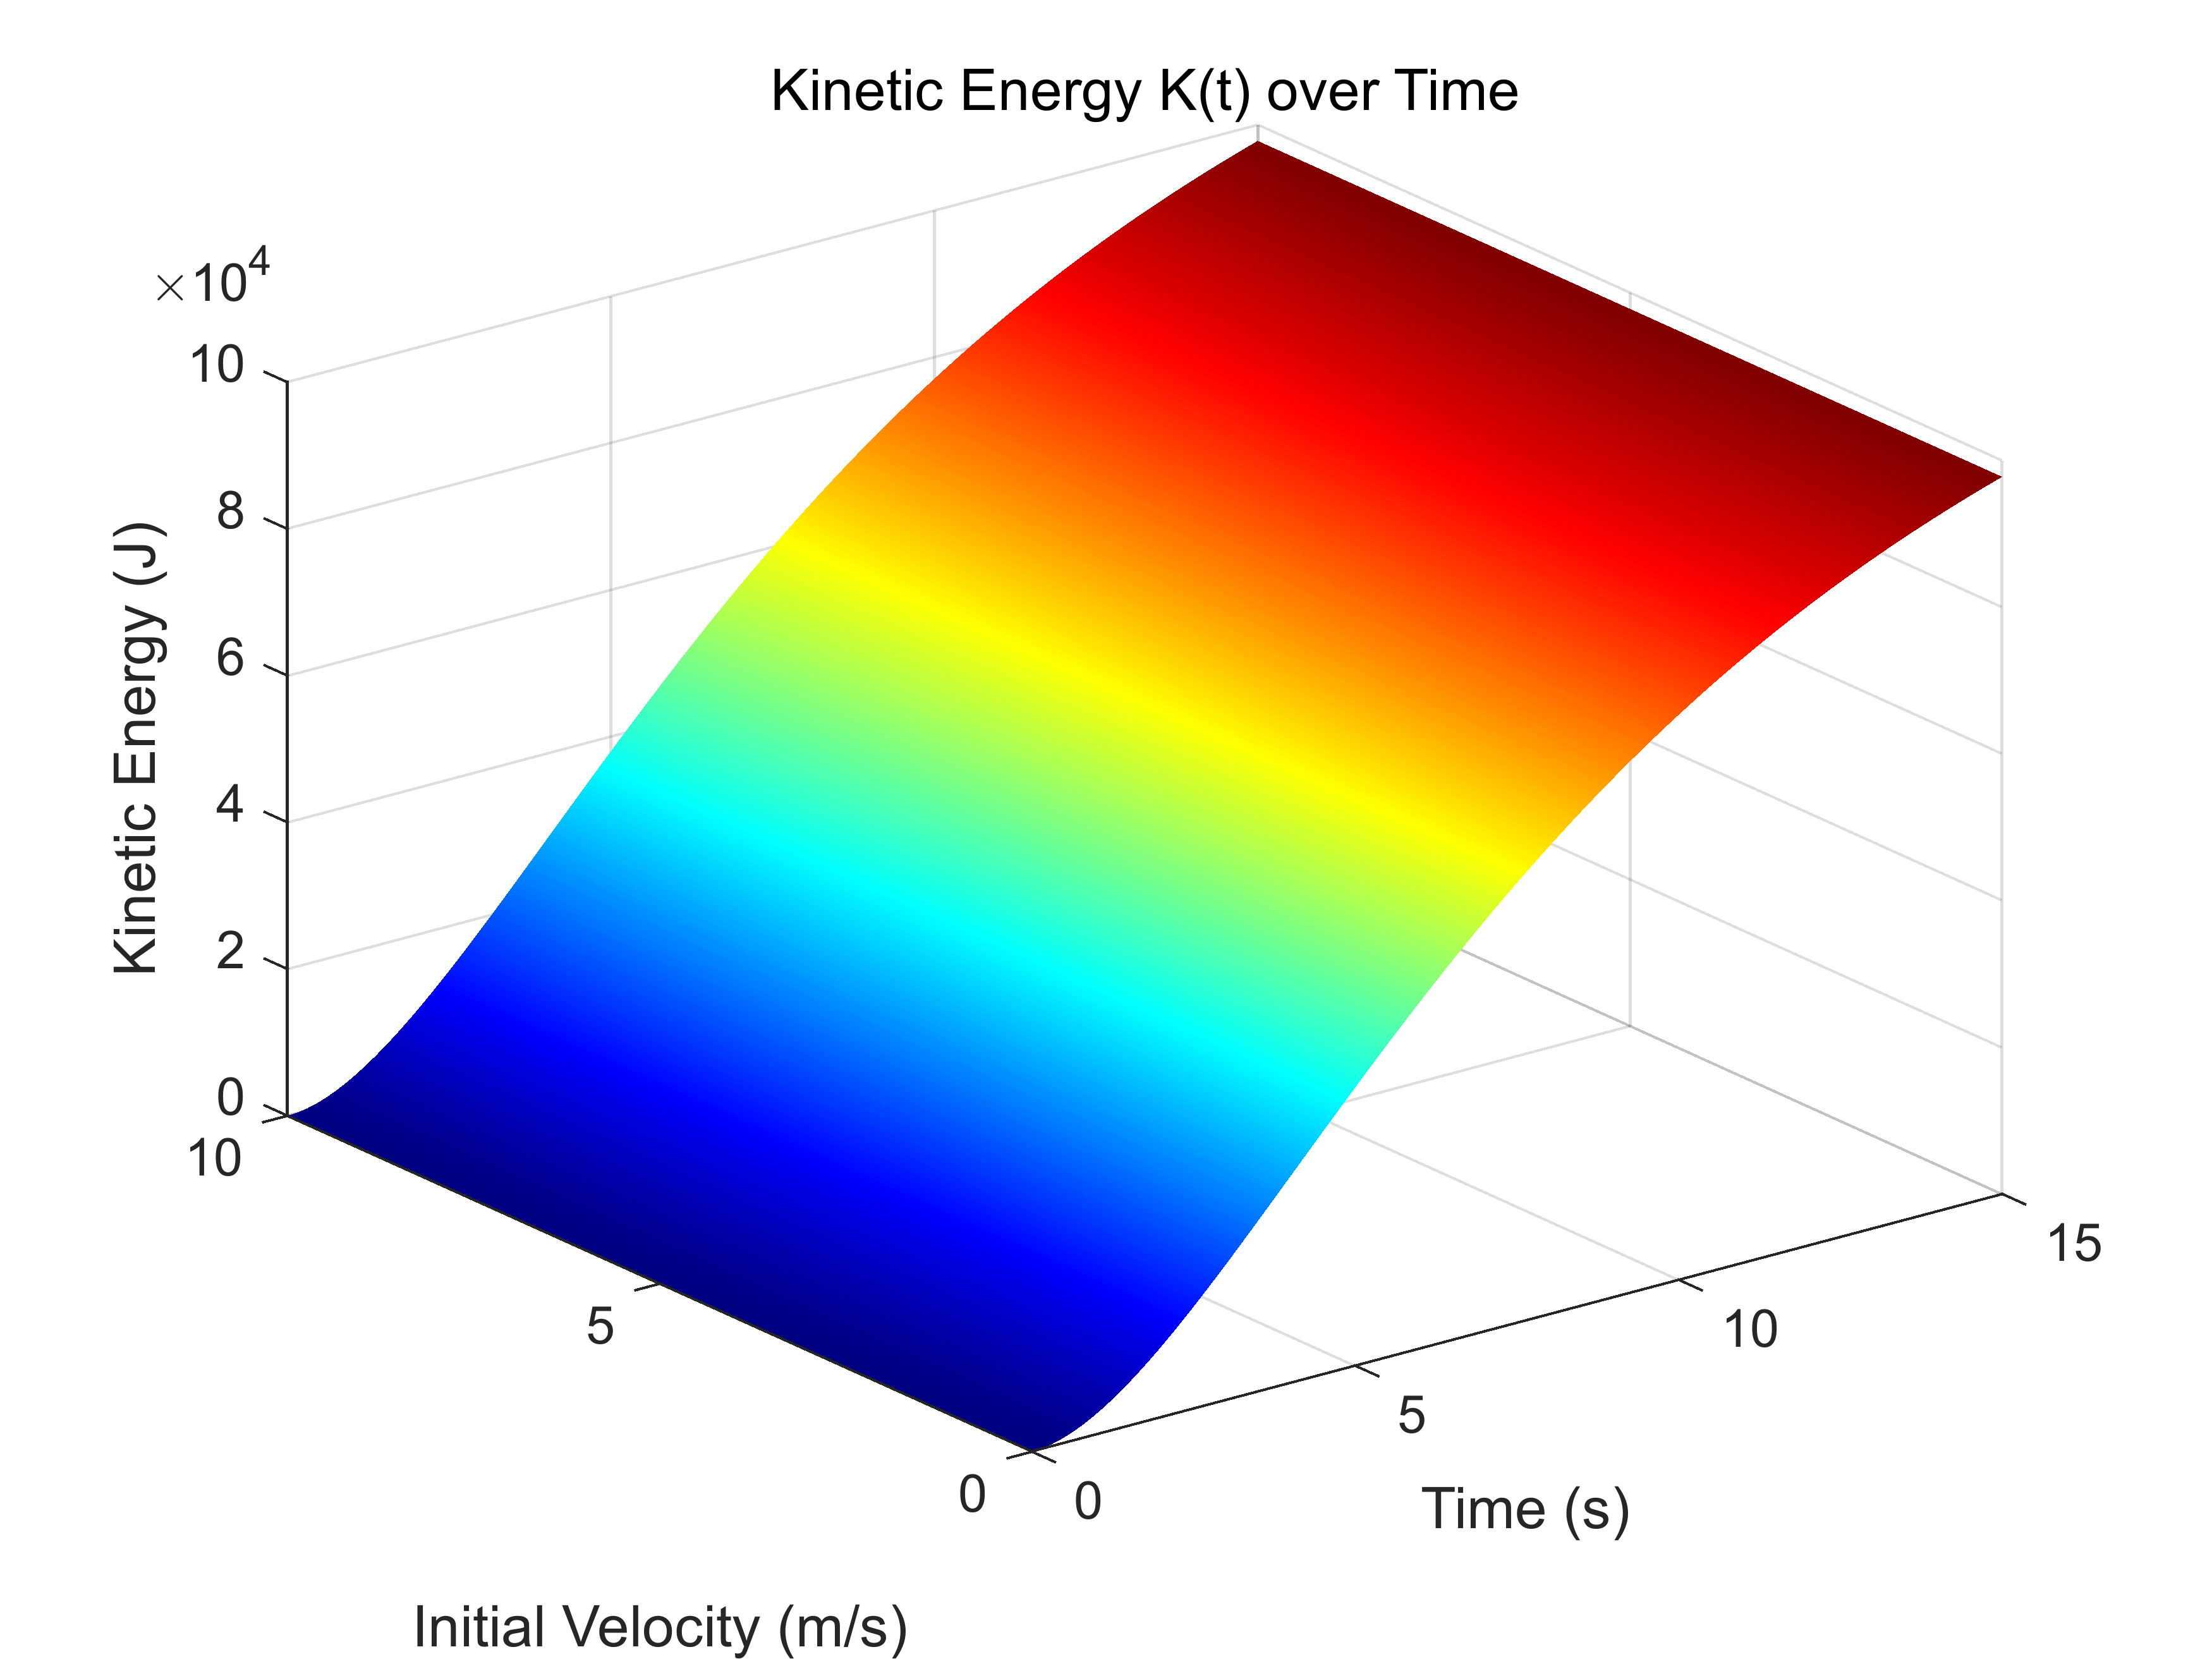

In [4]:
% 매개변수 설정
g = 9.81;  % 중력 가속도 (m/s^2)
m = 70;    % 질량 (kg)
k = 12;    % 공기 저항 계수 (kg/s)

% 시간과 초기 속도 범위 설정
t = linspace(0, 15, 100);  % 시간 범위 (0~15초)
v_initial = linspace(0, 10, 100); % 초기 속도 범위

% 그리드 생성
[T, V_initial] = meshgrid(t, v_initial);

% 속도 v(t) 계산
velocity = (m * g / k) * (1 - exp(- (k / m) * T));

% 운동 에너지 K(t) 계산
K = 0.5 * m .* velocity.^2;

% 3차원 선형 그래프 그리기
figure;
surf(T, V_initial, K);
xlabel('Time (s)');
ylabel('Initial Velocity (m/s)');
zlabel('Kinetic Energy (J)');
title('Kinetic Energy K(t) over Time');
colormap('jet'); % 색상맵 설정
shading interp; % 부드러운 색상 표현
grid on;



시간에 따른 속도의 변화를 보여줍니다. 시간 $t$ 에 따라 속도 $v(t)$ 가 증가하며 종단속도에 수렴하는 모습을 확인할 수 있습니다.


**1. 키르히호프의 법칙**


**1) 키르히호프의 전압법칙**

-  회로에서 임의의 루프를 따라 대수적으로 합한 전압의 합은 0

**2) 키르히호프의 전류법칙**

-  회로의 한 노드에서 유입·유출되는 전류의 합은 0

 **2.** $RC$ **직렬 전기회로**

-  주어진 회로에서 전압원 $e=10\,\textrm{V}$ , 저항 $R=10\,\Omega$ , 커패시턴스 $C=0.5\,\textrm{F}$

**문제 요구사항**

-  $t=0\,\textrm{s}$ 에서 전하량 $q(0)=0\,\textrm{C}$ 일 때 10초 후의 전하량은?

**미분방정식 적용**

-  해당 회로의 미분방정식은:

$$RC\frac{dq}{dt}+q=Ce$$

여기서 $R=10,C=0.5,e=10$ 을 대입


**해법**

-  위 식은 1계 선형 상미분방정식으로 풀이할 수 있습니다.
-  일반적으로 해를 구하면 전하량 $q(t)$ 는 시간에 따라 지수함수 형태로 수렴합니다.

예를 들어, 저항 및 커패시터 값이 주어진 경우 이론적으로

-  전하량 $q(t)=C\cdot e\cdot (1-e^{-\frac{t}{RC}} )$ 로 나타납니다.
-  10초 후 $t=10$ 을 대입하여 정확한 값을 계산하면 됩니다.


 **키르히호프의 법칙 적용:** $RC$ **회로 시뮬레이션**


주어진 $RC$ 회로의 미분방정식은 다음과 같습니다:


$$RC\frac{dq}{dt}+q=Ce$$

이를 정리하면 다음과 같이 됩니다:


 $\frac{dq}{dt}+\frac{1}{RC}q=\frac{e}{R}$ ​

-  이 식 역시 **1계 비제차 선형 상미분방정식**의 형태입니다.
-  마찬가지로 일반 형태인 $\frac{dy}{dt}+p(t)y=q(t)$ 에서 $p(t)=\frac{1}{RC},q(t)=\frac{e}{R}$ ​입니다.


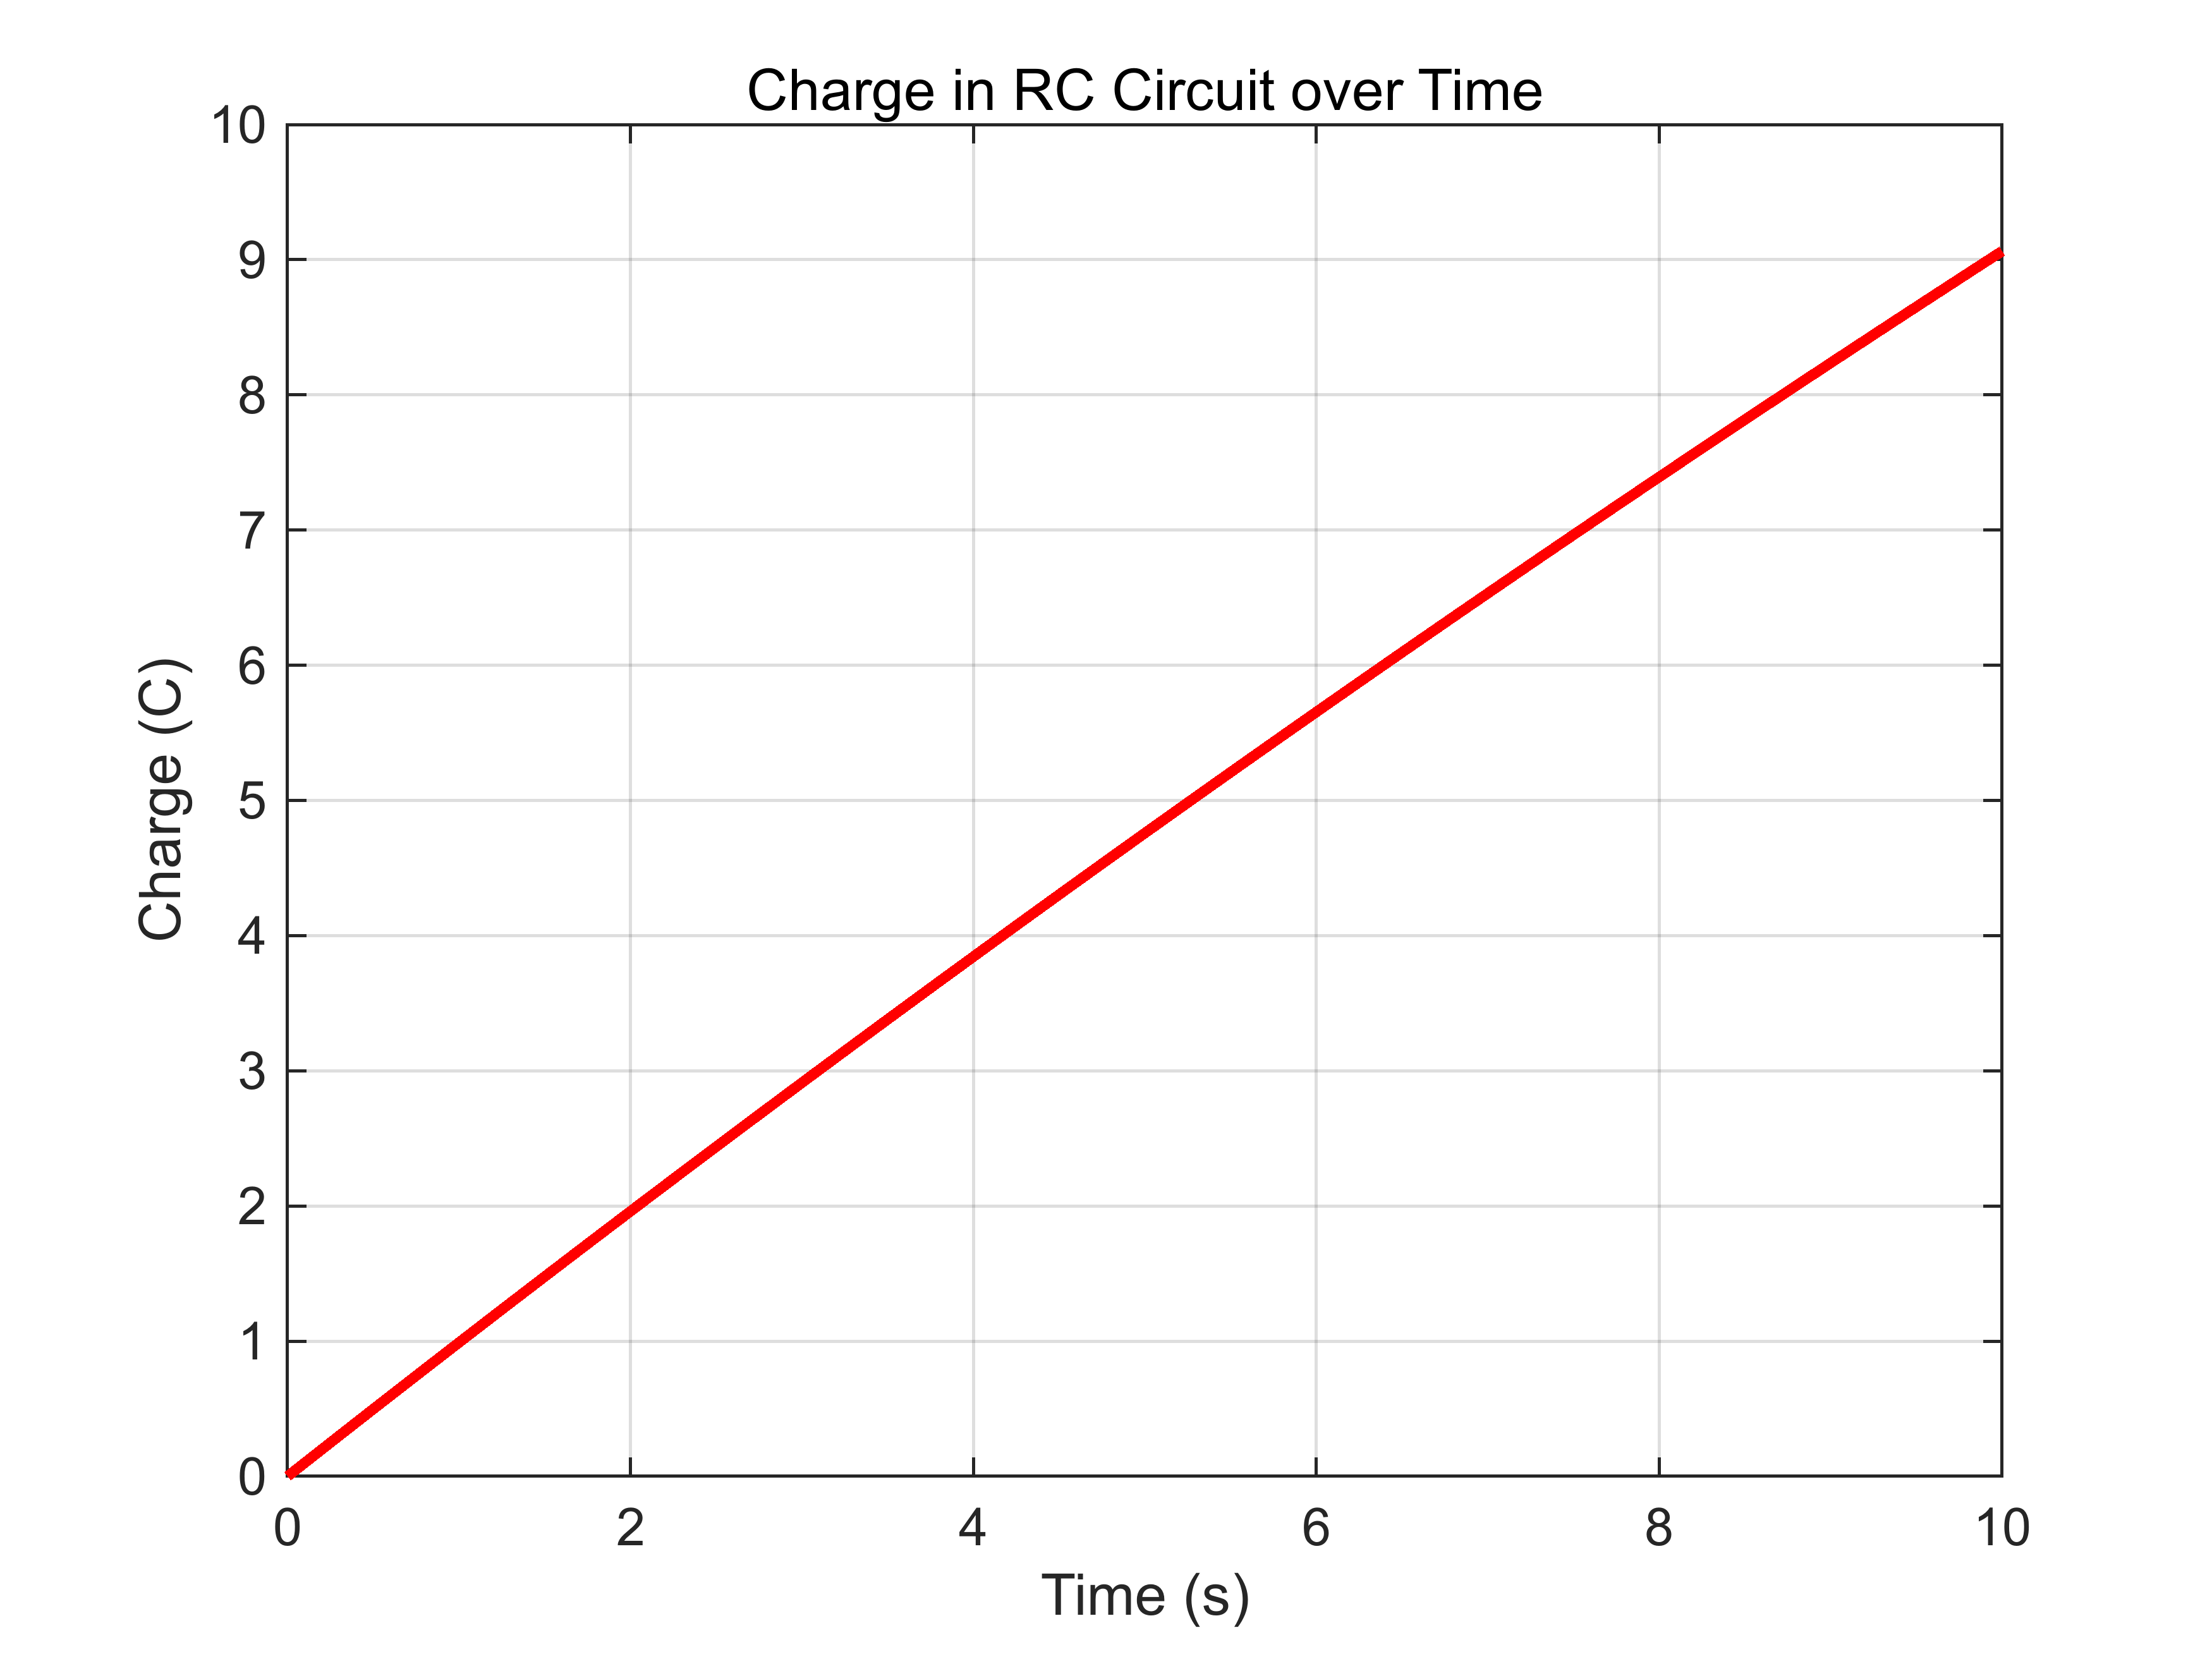

In [5]:
% 매개변수 설정
R = 10;      % 저항 (옴)
C = 0.5;     % 커패시터 (패럿)
E = 10;      % 전압원 (볼트)

% 미분방정식 정의
dqdt = @(t, q) (E - q/(R*C)) / R;

% 초기 조건 설정
q0 = 0; % 초기 전하량 (쿨롱)

% 시간 범위 설정
tspan = [0 10]; % 0초부터 10초까지

% ODE 솔버 사용
[t, q] = ode45(dqdt, tspan, q0);

% 결과 그래프 그리기
figure;
plot(t, q, 'r-', 'LineWidth', 2);
xlabel('Time (s)');
ylabel('Charge (C)');
title('Charge in RC Circuit over Time');
grid on;


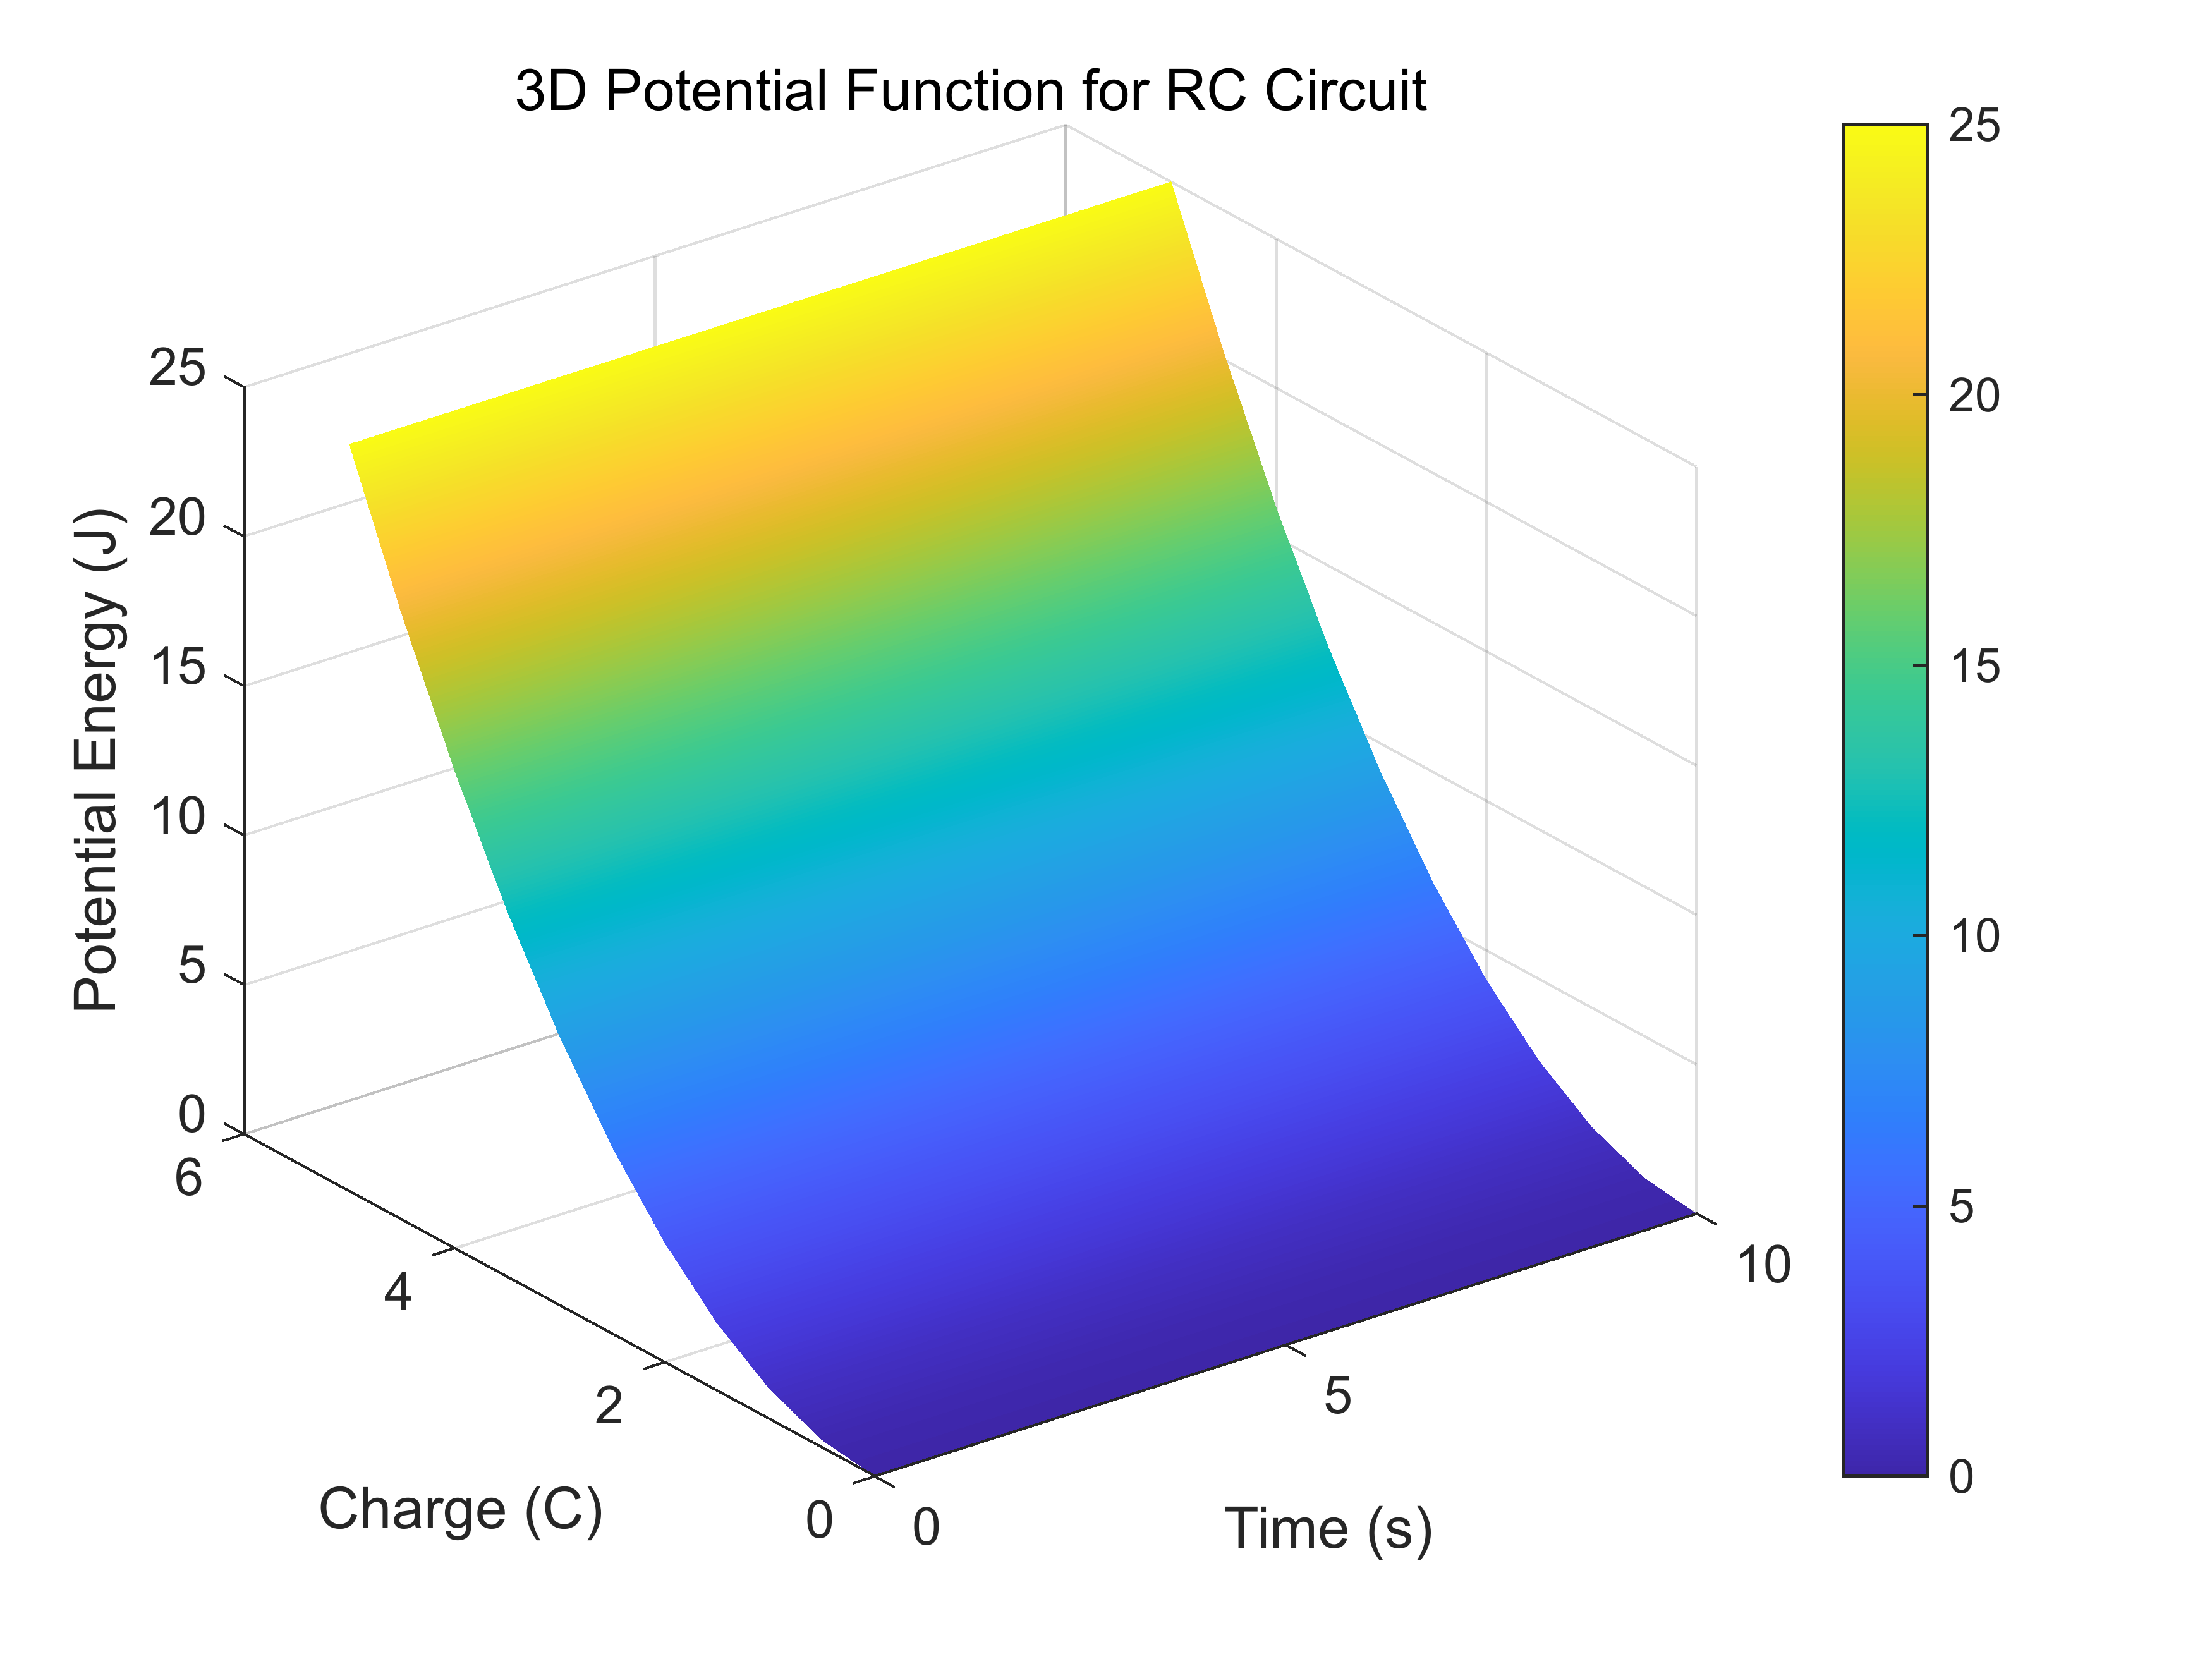

In [6]:
% 매개변수 설정
R = 10;     % 저항 (옴)
C_val = 0.5; % 커패시터 (패럿)
E = 10;     % 전압원 (볼트)

% 시간과 전하량을 위한 meshgrid 설정
[t, q] = meshgrid(0:0.5:10, 0:0.5:5);

% 포텐셜 에너지 함수 계산
U = (q.^2) / (2 * C_val); % 커패시터에 축적된 에너지

% 그래프 그리기
figure;
surf(t, q, U);
xlabel('Time (s)');
ylabel('Charge (C)');
zlabel('Potential Energy (J)');
title('3D Potential Function for RC Circuit');
grid on;
shading interp; % 그래프의 부드러운 표현
colorbar; % 색상막대 표시

## 일반해계산

주어진 방정식:


 $\frac{dq}{dt}+\frac{1}{RC}q=\frac{e}{R}$ ​


여기서


$$p(t)=\frac{1}{RC},q(t)=\frac{e}{R}$$

​입니다.


 **1. 적분인자** $\mu (t)$ **계산**


적분인자는 다음과 같이 정의됩니다:


 $\mu (t)=e^{\int \frac{1}{RC}\,dt} =e^{\frac{t}{RC}}$ ​


**2. 방정식에 적분인자 곱하기**


원래 식에 적분인자를 곱하면:


 $e^{\frac{t}{RC}} \frac{dq}{dt}+\frac{1}{RC}e^{\frac{t}{RC}} q=\frac{e}{R}e^{\frac{t}{RC}}$ ​


이는 다음과 같이 쓸 수 있습니다:


 $\frac{d}{dt}\left(e^{\frac{t}{RC}} q\right)=\frac{e}{R}e^{\frac{t}{RC}}$ ​


**3. 양변을 적분**


$$e^{\frac{t}{RC}} q=\int \frac{e}{R}e^{\frac{t}{RC}} \,dt$$

우변을 적분하면:


$$e^{\frac{t}{RC}} q=Ce^{\frac{t}{RC}} +eC$$

따라서,


$$q=Ce^{-\frac{t}{RC}} +Ce$$

**4. 일반해**


$$q(t)=Ce^{-\frac{t}{RC}} +Ce$$

**초기 조건**

-  $t=0$ 에서 $q(0)=0$

이 초기 조건을 대입하면:


$$0=C\cdot e^0 +Ce$$

따라서, $C=-Ce$


따라서, 초기 조건을 고려한 해는:


$$q(t)=Ce\left(1-e^{-\frac{t}{RC}} \right)$$

#### 완전 상미분방정식의 여부

주어진 미분방정식은 다음과 같습니다:


 $\frac{dq}{dt}+\frac{1}{RC}q=\frac{e}{R}$ ​


이를 1계 선형 상미분방정식 형태로 나타내면:


$$\frac{dy}{dt}+p(t)y=q(t)$$

여기서 $p(t)=\frac{1}{RC}$ 이고, $q(t)=\frac{e}{R}$ ​ 입니다.


**완전상미분 방정식의 조건**


주어진 식:


 $\frac{dq}{dt}+\frac{1}{RC}q=\frac{e}{R}$ ​


이 식을 다음과 같은 형태로 표현할 수 있습니다:


$$\frac{dq}{dt}=\frac{e}{R}-\frac{1}{RC}q$$

따라서, 다음과 같은 미분방정식 형태로 표현할 수 있습니다:


$$\frac{dq}{dt}+\frac{1}{RC}q-\frac{e}{R}=0$$

이를 $M(q,t)+N(q,t)\frac{dq}{dt}=0$ 형태로 보면,


$$M(q,t)=\frac{1}{RC}q-\frac{e}{R},~~N(q,t)=1$$

**완전성 확인**

-  $\frac{\partial M}{\partial t}=0$ (왜냐하면 $M$ 에는 $t$ 에 대한 직접적인 의존성이 없음)
-  $\frac{\partial N}{\partial q}=0$ (왜냐하면 $N$ 은 $q$ 에 대한 의존성이 없음)

마찬가지로 $\frac{\partial M}{\partial t}\not= \frac{\partial N}{\partial q}$ ​이므로 이 방정식도 완전 미분방정식이 아닙니다. 즉, 이 방정식 또한 **비완전 상미분방정식**입니다.

## 포텐셜 함수 변환

키르히호프 법칙에서 전하량 $q(t)=Ce(1-e^{-\frac{t}{RC}} )$ 은 커패시터에 축적되는 전하량을 나타냅니다.

-   **전기 포텐셜 에너지** $U(t)$ : 커패시터의 전기적 에너지는

$$U(t)=\frac{1}{2}\frac{q(t)^2 }{C}=\frac{1}{2}Ce^2 {\left(1-e^{-\frac{t}{RC}} \right)}^2$$

-  이 식은 시간에 따른 커패시터에 저장된 전기 에너지를 나타내며, 이를 통해 전기적 포텐셜의 변화를 알 수 있습니다.


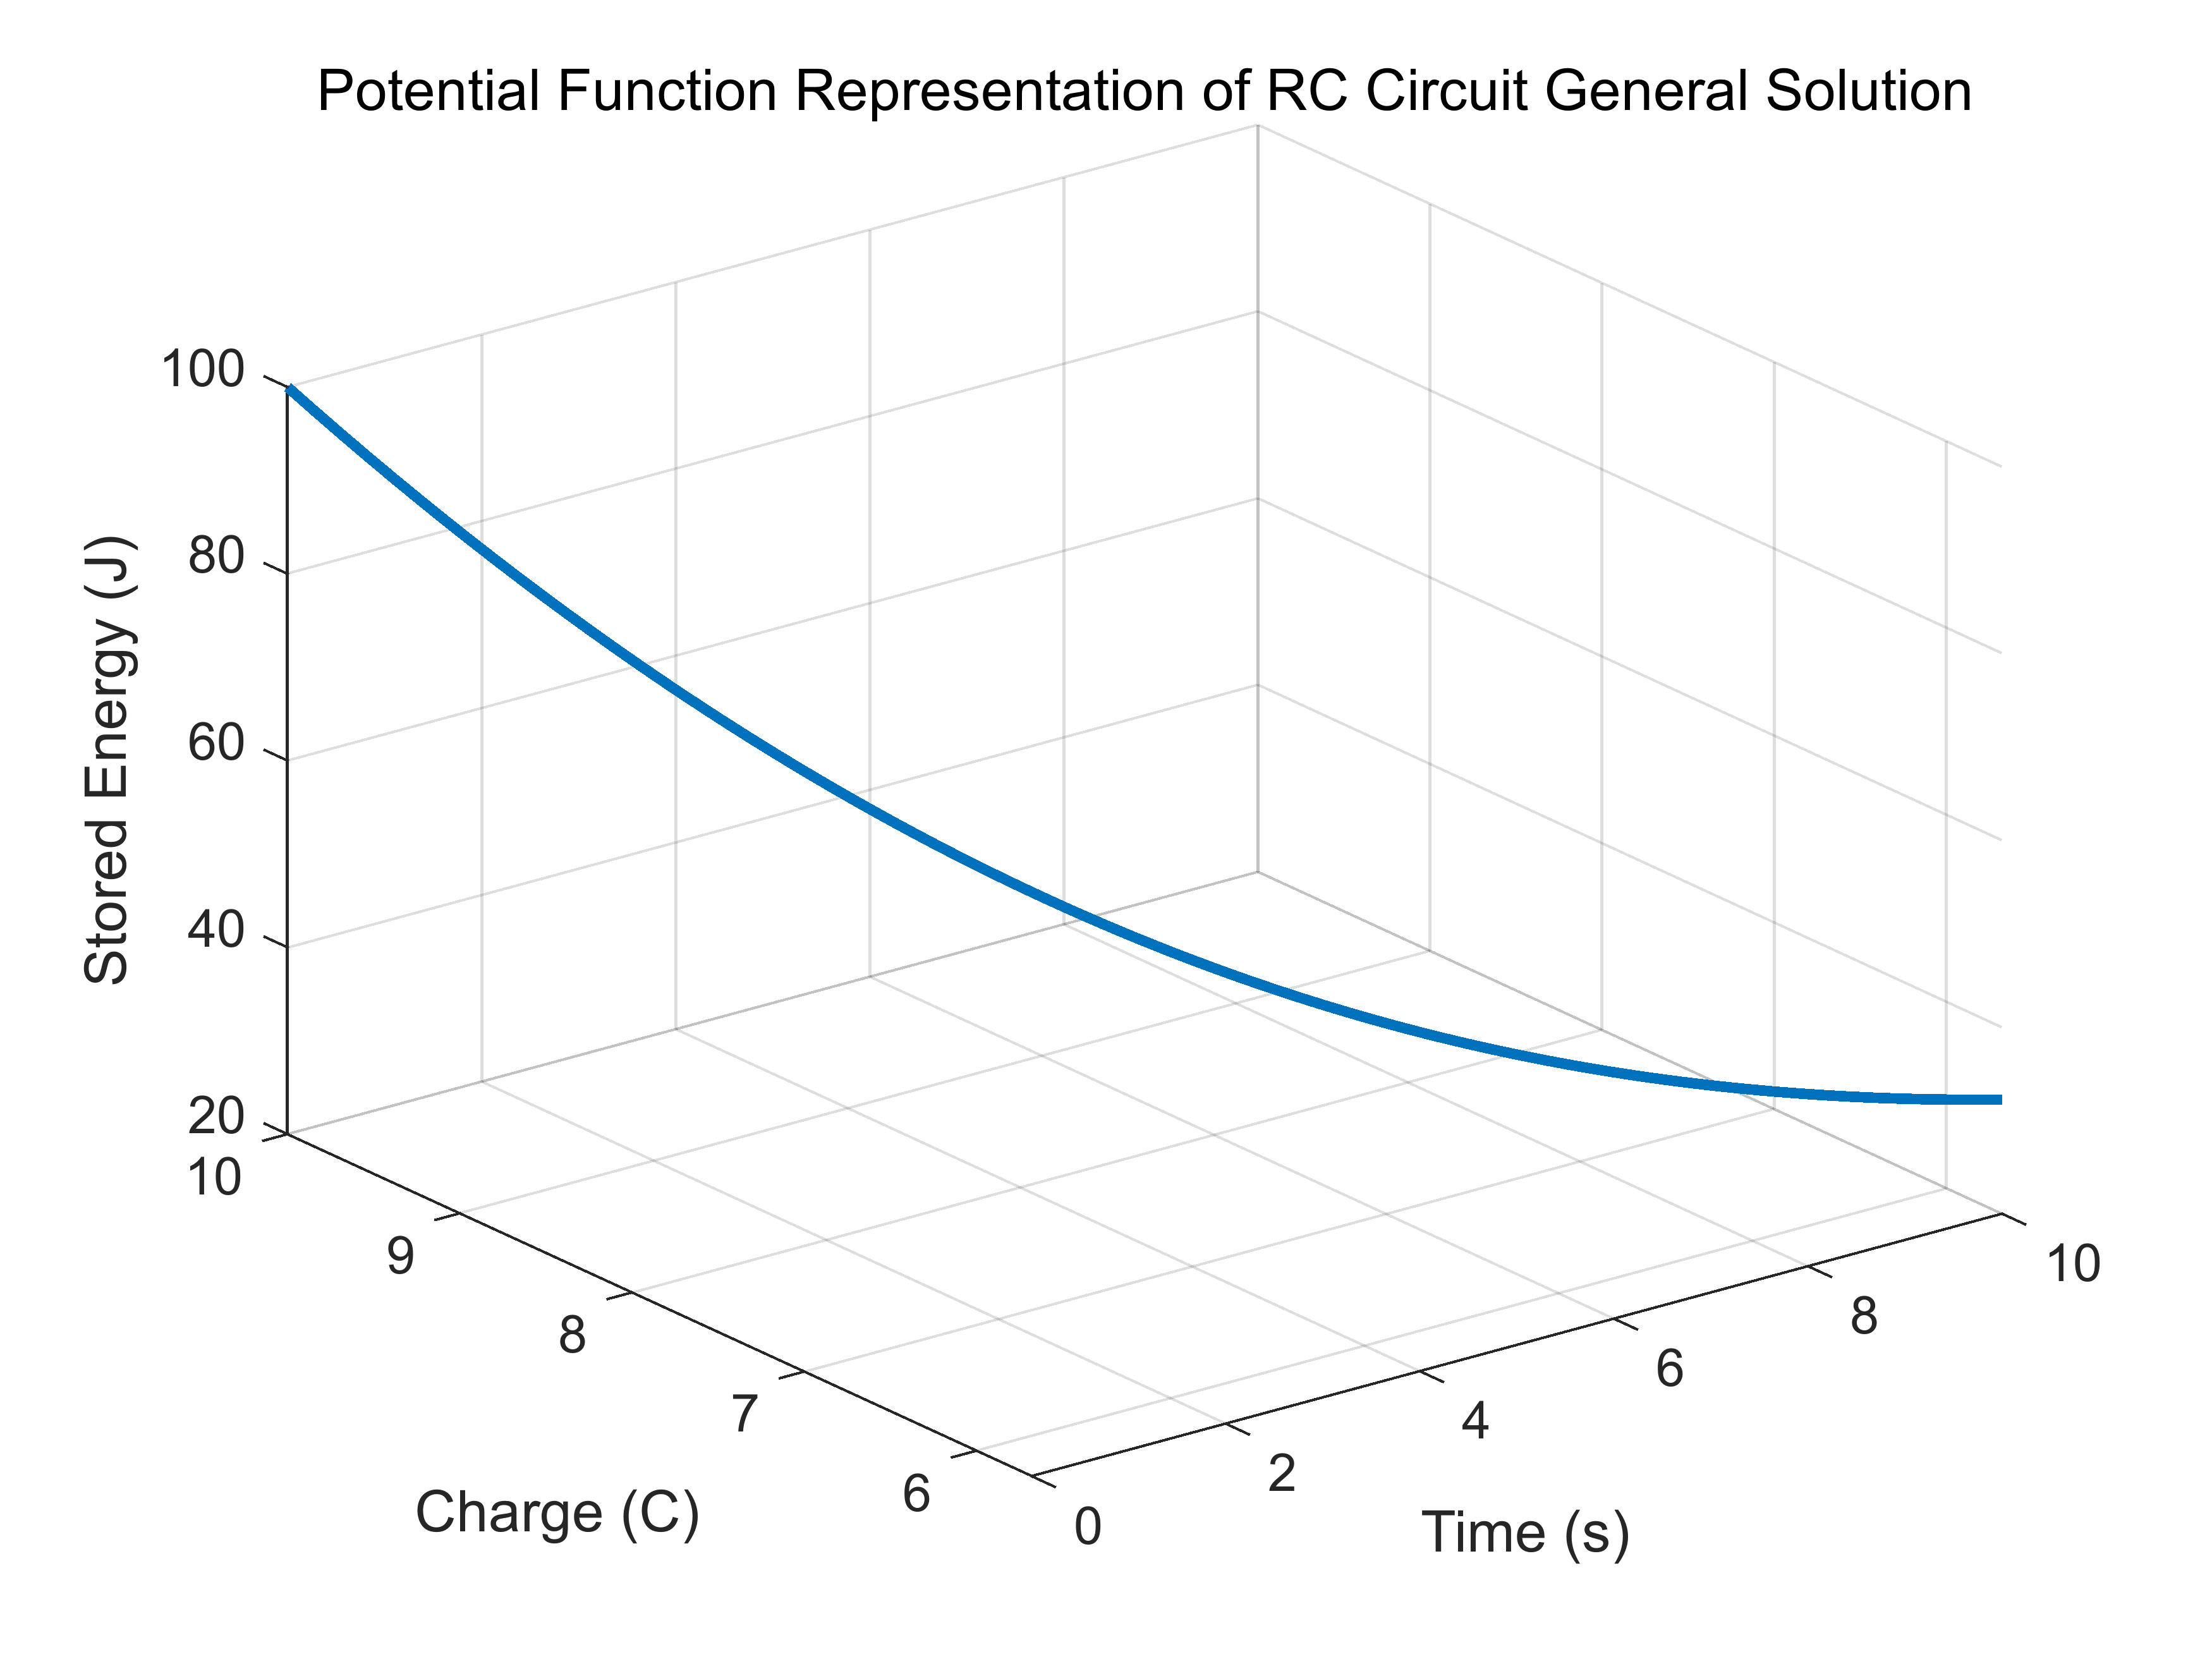

In [7]:
% 매개변수 설정
R = 10;       % 저항 (옴)
C_val = 0.5;  % 커패시터 (패럿)
E = 10;       % 전압원 (볼트)
C = 5;        % 초기조건으로부터 결정되는 상수

% 시간 범위 설정
t = linspace(0, 10, 100); % 0부터 10초까지

% 전하량 q(t)의 일반해
q = C * exp(-t / (R * C_val)) + C_val * E;

% 커패시터에 저장된 에너지 U 계산
U = (q.^2) / (2 * C_val);

% 3D 그래프 그리기
figure;
plot3(t, q, U, 'LineWidth', 2);
xlabel('Time (s)');
ylabel('Charge (C)');
zlabel('Stored Energy (J)');
title('Potential Function Representation of RC Circuit General Solution');
grid on;


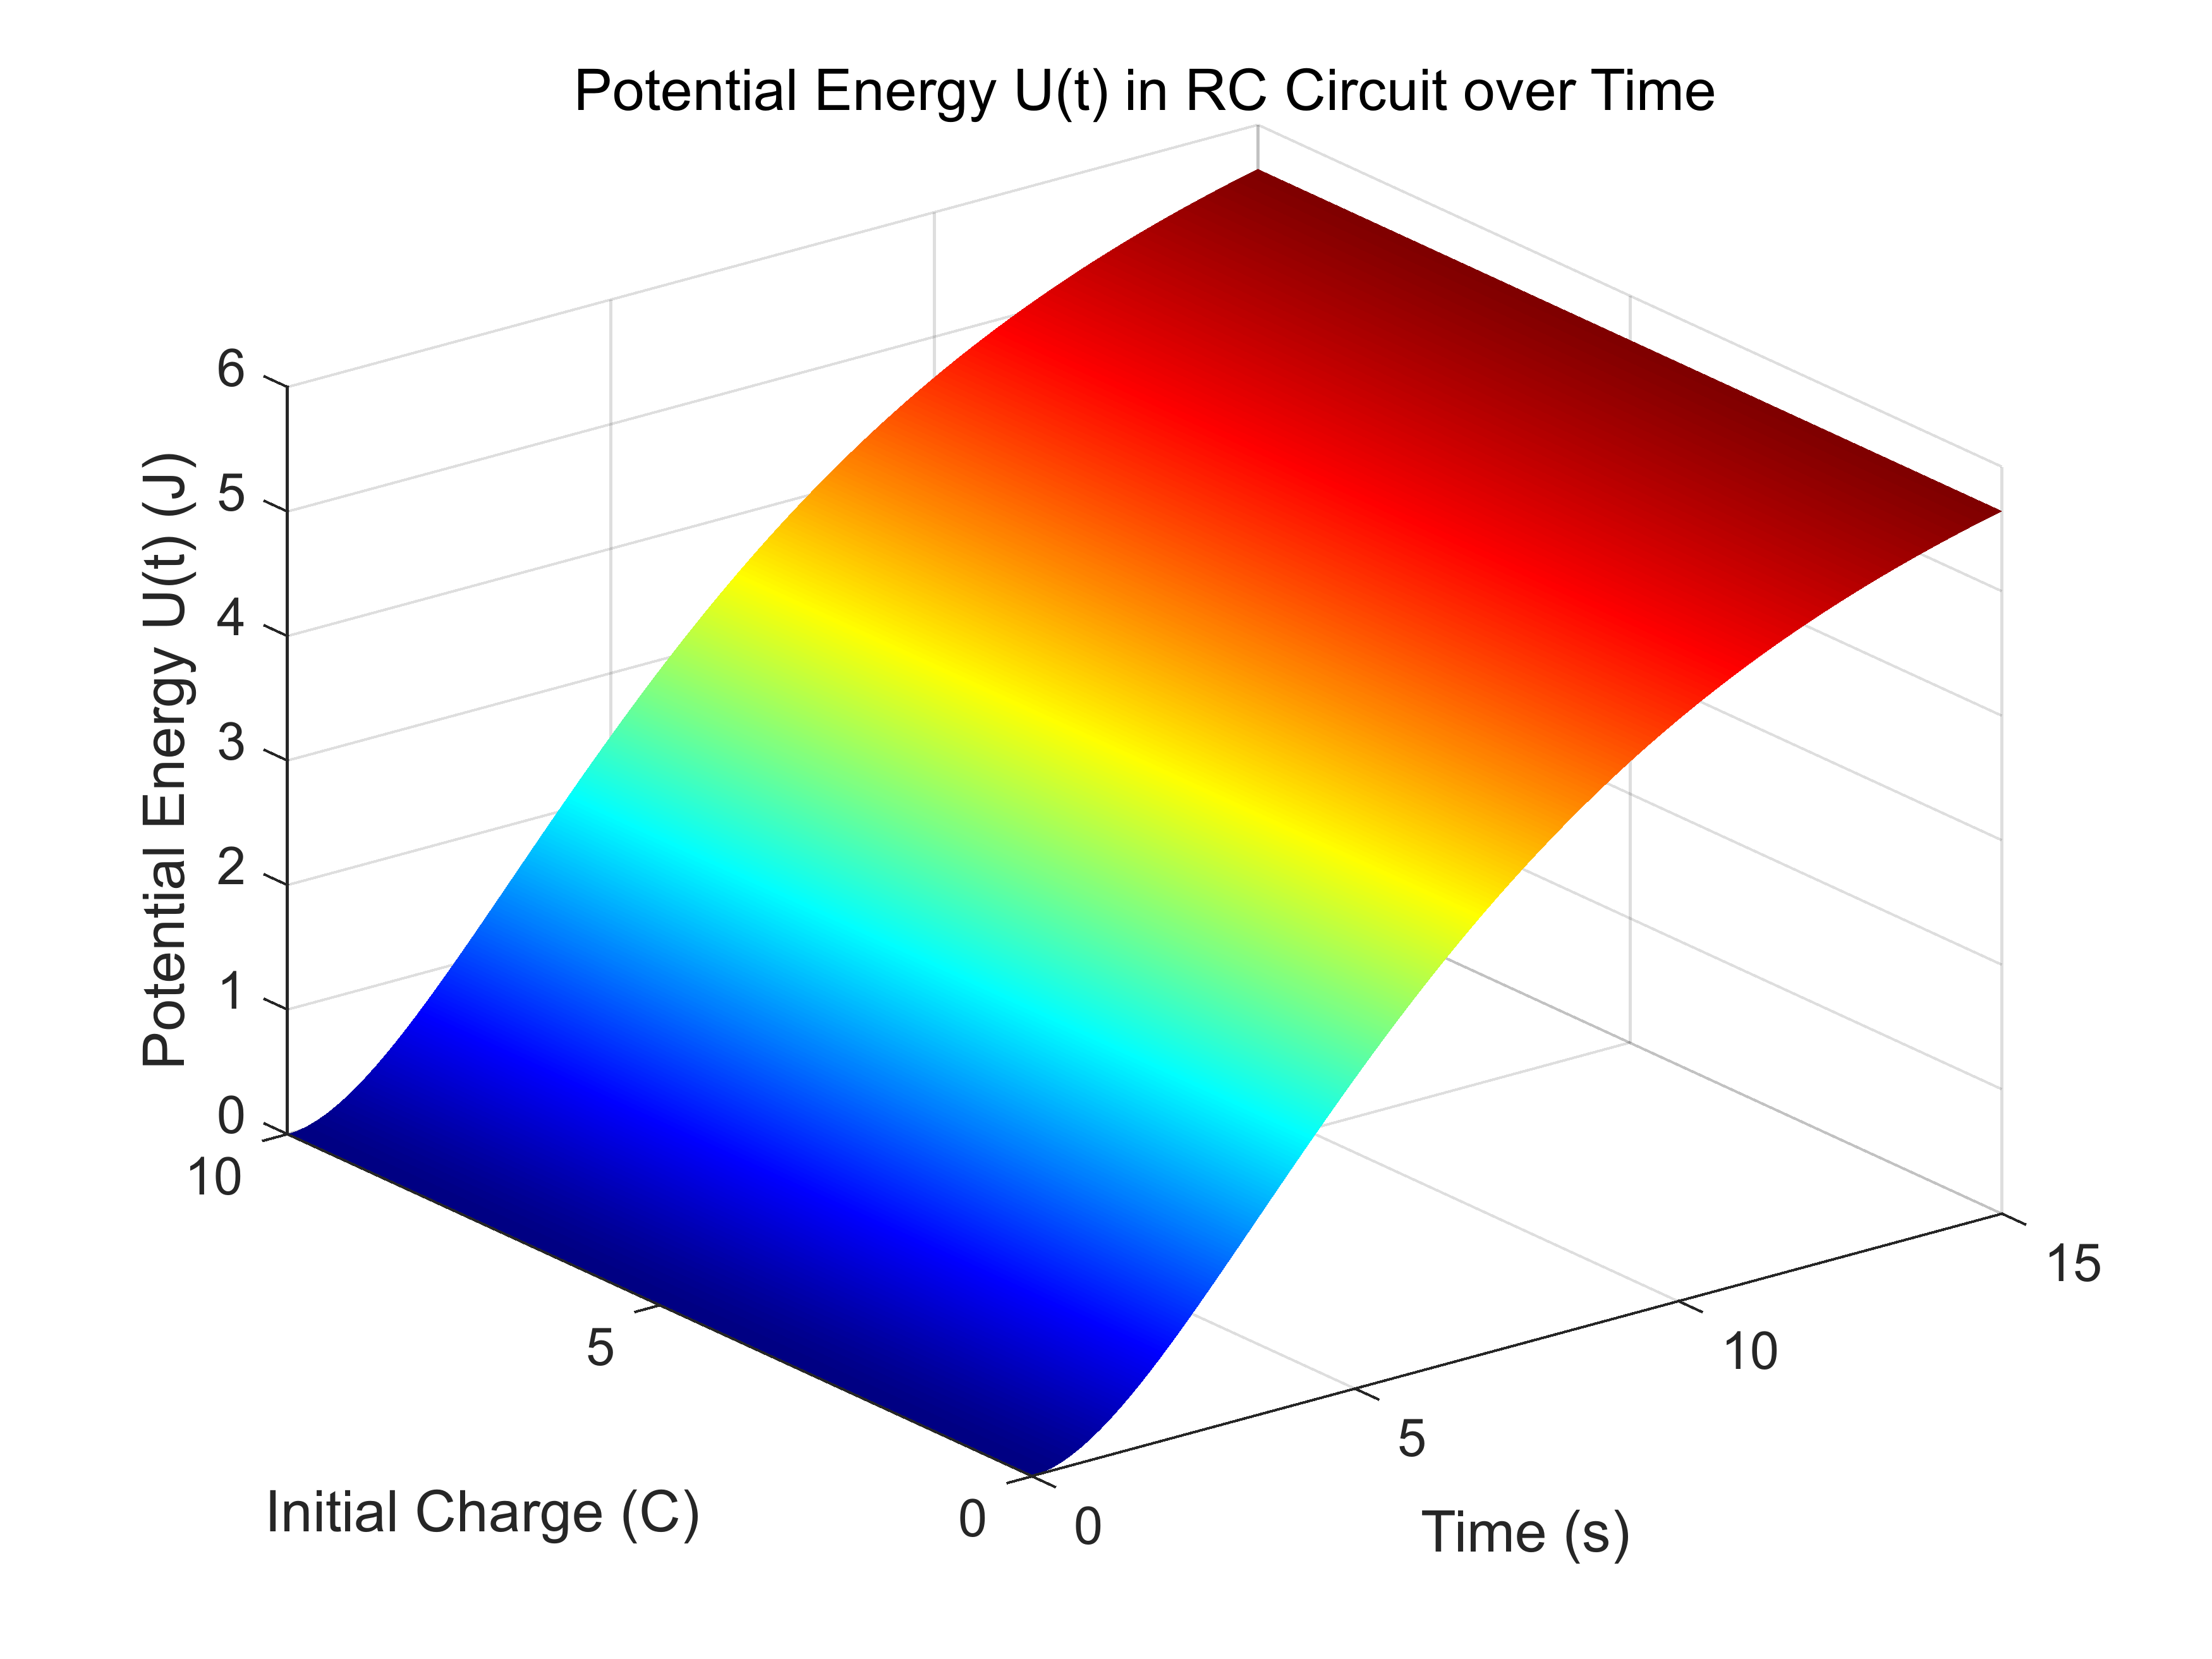

In [8]:
% 매개변수 설정
R = 10;    % 저항 (옴)
C = 0.5;   % 커패시터 (패럿)
e = 10;    % 전압원 (볼트)

% 시간 범위 설정
t = linspace(0, 15, 100);  % 시간 범위 (0~15초)
q_initial = linspace(0, 10, 100); % 초기 전하량 범위

% 그리드 생성
[T, Q_initial] = meshgrid(t, q_initial);

% 전하량 계산 (RC 회로 식에 따른 계산)
q_t = C * e * (1 - exp(-T / (R * C)));

% 전기 에너지 U(t) 계산
U_t = 0.5 * C * (q_t).^2;

% 3차원 그래프 그리기
figure;
surf(T, Q_initial, U_t);
xlabel('Time (s)');
ylabel('Initial Charge (C)');
zlabel('Potential Energy U(t) (J)');
title('Potential Energy U(t) in RC Circuit over Time');
colormap('jet'); % 색상맵 설정
shading interp; % 부드러운 색상 표현



시간에 따른 커패시터에 축적되는 전하량 $q(t)$ 을 나타냅니다. 전하량이 시간에 따라 증가하며, 점차적으로 최종값에 도달하는 모습을 볼 수 있습니다.

